In [19]:
from pathlib import Path, PosixPath
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import shutil
import matplotlib.pyplot as plt

In [20]:
%matplotlib auto
def plot_heatmap(df_corr):
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn) # Red Yellow Green
    fig.colorbar(heatmap)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis() # così row1 col1 sono uguali, row2, col2 idem, etc.
    ax.xaxis.tick_top() # ticks on top e non bottom


    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)

    plt.xticks(rotation=90) # ruoto di 90° i tick sull'asse delle x
    heatmap.set_clim(-1,1)

    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                    horizontalalignment='center',
                    verticalalignment='center')



    plt.tight_layout()
    plt.show()

Using matplotlib backend: MacOSX


In [3]:
dirpath = os.path.join('COVID-19')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [4]:
!git clone https://github.com/pcm-dpc/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 928, done.
remote: Total 928 (delta 0), reused 0 (delta 0), pack-reused 928
Receiving objects: 100% (928/928), 30.67 MiB | 6.93 MiB/s, done.
Resolving deltas: 100% (639/639), done.


In [26]:
df = pd.read_csv('./COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df.set_index('data', inplace=True)
df.drop(['stato'], 1, inplace=True)

In [27]:
print("Numero di giorni: ", len(df))
#df.tail(1)

Numero di giorni:  28


In [28]:
df_corr = df.pct_change().corr(method='pearson')
df_corr.head(3)

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
ricoverati_con_sintomi,1.000000,0.592361,0.992149,-0.010775,0.732164,0.449772,0.745838,0.371993,0.812058,0.036748
terapia_intensiva,0.592361,1.000000,0.686035,0.141271,0.597548,0.245737,0.451779,0.512702,0.639259,0.296427
totale_ospedalizzati,0.992149,0.686035,1.000000,0.011781,0.752032,0.438822,0.734217,0.421254,0.829889,0.092988


In [29]:
plot_heatmap(df_corr)

In [30]:
#group = df.groupby('denominazione_regione')['denominazione_regione'].count()
#group.head(20)

### Seleziona regione

In [31]:
regione = 'Piemonte'
#regione = 'Lombardia'

In [32]:
group = df.groupby('denominazione_regione')['denominazione_regione'].count()
df_regione = df.loc[df['denominazione_regione'] == regione]

KeyError: 'denominazione_regione'

In [9]:
df_regione.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
495,2020-03-18 17:00:00,ITA,1,Piemonte,45.073274,7.680687,1780,227,2007,180,2187,423,0,154,2341,7516
516,2020-03-19 17:00:00,ITA,1,Piemonte,45.073274,7.680687,2279,257,2536,218,2754,567,3,175,2932,8853
537,2020-03-20 17:00:00,ITA,1,Piemonte,45.073274,7.680687,1541,280,1821,1423,3244,490,8,209,3461,9975
558,2020-03-21 17:00:00,ITA,1,Piemonte,45.073274,7.680687,1976,301,2277,1229,3506,262,8,238,3752,10701
579,2020-03-22 17:00:00,ITA,1,Piemonte,45.073274,7.680687,2118,308,2426,1701,4127,621,10,283,4420,12701


### Correlazione tamponi-casi

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

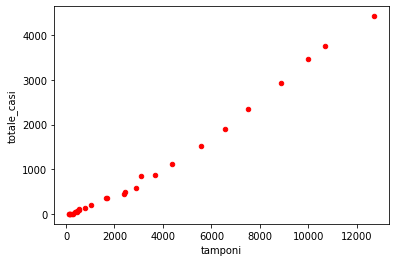

In [11]:
df_regione.plot(kind='scatter',x='tamponi',y='totale_casi',color='red')
plt.show()

### Correlazione generale

In [12]:
# df_regione.corr()

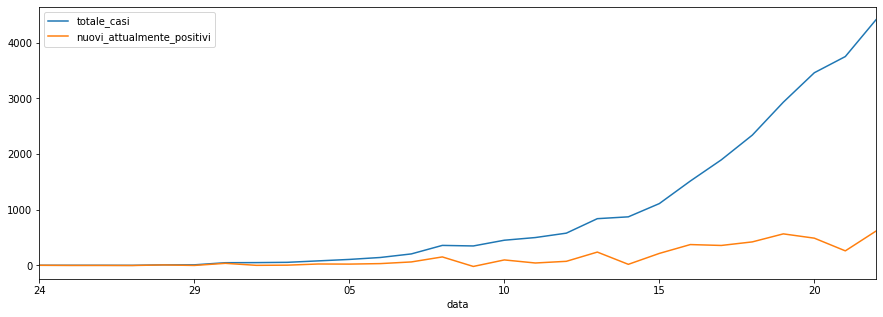

In [13]:
# gca stands for 'get current axis'
ax = plt.gca()
    
df_regione.plot(kind='line',x='data',y='totale_casi',ax=ax, figsize=(15, 5), rot=0)
#df_regione.plot(kind='line',x='data',y='terapia_intensiva',ax=ax, figsize=(15, 5), rot=0)
df_regione.plot(kind='line',x='data',y='nuovi_attualmente_positivi',ax=ax, figsize=(15, 5), rot=0)

labels = [item.get_text() for item in ax.get_xticklabels()]
for i, label in enumerate(labels):
    try:
        labels[i] = label.split(' ')[0].split('-')[2]
    except IndexError:
        pass

ax.set_xticklabels(labels)
#ax.set_yticklabels(np.arange[1,1100,100])
plt.show()

### Andamento generale

In [14]:
df_regione['incremento'] = df_regione['totale_casi'].pct_change() * 100

In [15]:
df_regione[['data','incremento']]

,data,incremento
12,2020-02-24 18:00:00,NaN
33,2020-02-25 18:00:00,0.000000
54,2020-02-26 18:00:00,0.000000
75,2020-02-27 18:00:00,-33.333333
96,2020-02-28 18:00:00,450.000000
117,2020-02-29 17:00:00,0.000000
138,2020-03-01 17:00:00,345.454545
159,2020-03-02 18:00:00,4.081633
180,2020-03-03 18:00:00,9.803922
201,2020-03-04 17:00:00,46.428571


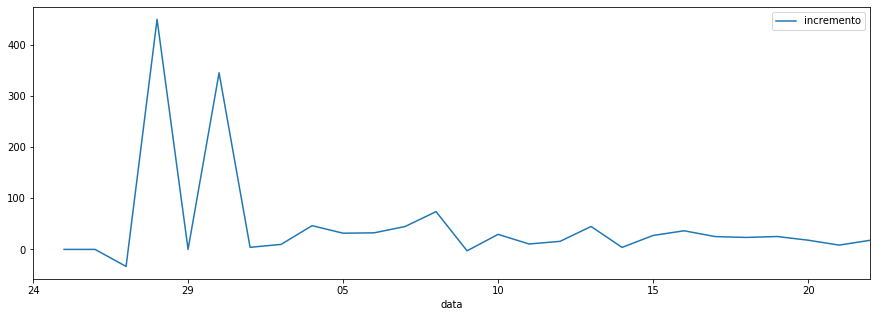

In [16]:
ax = plt.gca()
df_regione.plot(kind='line',x='data',y='incremento',ax=ax, figsize=(15, 5))

labels = [item.get_text() for item in ax.get_xticklabels()]
for i, label in enumerate(labels):
    try:
        labels[i] = label.split(' ')[0].split('-')[2]
    except IndexError:
        pass

ax.set_xticklabels(labels)
plt.show()

In [17]:
df_regione.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,incremento
495,2020-03-18 17:00:00,ITA,1,Piemonte,45.073274,7.680687,1780,227,2007,180,2187,423,0,154,2341,7516,23.405377
516,2020-03-19 17:00:00,ITA,1,Piemonte,45.073274,7.680687,2279,257,2536,218,2754,567,3,175,2932,8853,25.245622
537,2020-03-20 17:00:00,ITA,1,Piemonte,45.073274,7.680687,1541,280,1821,1423,3244,490,8,209,3461,9975,18.042292
558,2020-03-21 17:00:00,ITA,1,Piemonte,45.073274,7.680687,1976,301,2277,1229,3506,262,8,238,3752,10701,8.407975
579,2020-03-22 17:00:00,ITA,1,Piemonte,45.073274,7.680687,2118,308,2426,1701,4127,621,10,283,4420,12701,17.803838
